## Import des librairies

In [106]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

# 1.Pre-Processing

## Import du dataset

In [63]:
df = pd.read_csv('data_2000_2020.csv')

C:\Users\Utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (12,15,16,17,18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Colonnes à supprimer

In [64]:
liste = ['W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5','Wsets', 'Lsets','Location', 'Tournament', 'MaxW', 'MaxL', 'AvgW', 'AvgL']
df = df.drop(liste, axis = 1)
#We drop these columns either because they contain info that are not available before the tennis game takes place 
#or because they contain too many values that would make the number of columns after the one-hot encoding way too big.

In [65]:
#This function allows us to get a list of the colums with the number of values, the number of null values and their type.
#The argument 'only_empty = True' makes the function send back only columns that have null values
def get_info_columns(df,only_empty=True):
    df_info=pd.DataFrame()
    cols=[]
    isnull=[]
    count_values=[]
    type_cols=[]
    for col in df.columns:
        if only_empty:
            if df[col].isnull().sum() >0:
                if col=="Location":
                    cols.append(col)
                    isnull.append(df[col].isnull().sum())
                    count_values.append(len(df[col].value_counts()))
                    type_cols.append(df[col].dtype)
                    #print("*"*5,'\n',"col:",col,"\nNulles",df[col].isnull().sum(),"\nvalue counts",len(df[col].value_counts()),"\ntype",df[col].dtype,"\n")
                else:
                    cols.append(col)
                    isnull.append(df[col].isnull().sum())
                    count_values.append(len(df[col].value_counts()))
                    type_cols.append(df[col].dtype)
    df_info["cols"]=cols
    df_info["isnull"]=isnull
    df_info["count_values"]=count_values
    df_info["type_cols"]=type_cols

    return df_info

In [66]:
info = get_info_columns(df,only_empty=False)

## Traitement de "la variable joueurs"

20 premiers -> garde leur noms 20-50 -> "classé-20-50" 50-100 -> "classé-20-50" 100-200 -> "classé-100-200" 200-500 -> "classé-200-500" 500-1000 -> "classé-500-1000"


In [67]:
df["LRank"] = pd.to_numeric(df["LRank"], errors='coerce')
df.loc[(df['WRank'] > 15) & (df['WRank'] <= 25),'Winner'] = "classé-15-25"
df.loc[(df['WRank'] > 25) & (df['WRank'] <= 50),'Winner'] = "classé-25-50"
df.loc[(df['WRank'] > 50) & (df['WRank'] <= 100),'Winner'] = "classé-50-100"
df.loc[(df['WRank'] > 100) & (df['WRank'] <= 200),'Winner'] = "classé-100-200"
df.loc[(df['WRank'] > 200) & (df['WRank'] <= 500),'Winner'] = "classé-200-500"
df.loc[(df['WRank'] > 500) & (df['WRank'] <= 1000),'Winner'] = "classé-500-1000"
df.loc[(df['WRank'] >1000),'Winner'] = "classé-plus-de-1000"
df.loc[(df['LRank'] > 15) & (df['LRank'] <= 25),'Loser'] = "classé-15-25"
df.loc[(df['LRank'] > 25) & (df['LRank'] <= 50),'Loser'] = "classé-25-50"
df.loc[(df['LRank'] > 50) & (df['LRank'] <= 100),'Loser'] = "classé-50-100"
df.loc[(df['LRank'] > 100) & (df['LRank'] <= 200),'Loser'] = "classé-100-200"
df.loc[(df['LRank'] > 200) & (df['LRank'] <= 500),'Loser'] = "classé-200-500"
df.loc[(df['LRank'] > 500) & (df['LRank'] <= 1000),'Loser'] = "classé-500-1000"
df.loc[(df['LRank'] >1000),'Loser'] = "classé-plus-de-1000"

Traitement du problème de format des noms des joueurs dû à la fusion de plusieurs bases de données (blanc avant ou après le nom...)

In [68]:
df.loc[(df['Winner'] == 'Djokovic N. '), 'Winner'] = 'Djokovic N.'
df.loc[(df['Winner'] == 'Federer R. '), 'Winner'] = 'Federer R.'
df.loc[(df['Winner'] == 'Nadal R. '), 'Winner'] = 'Nadal R.'
df.loc[(df['Winner'] == 'Murray A. '), 'Winner'] = 'Murray A.'
df.loc[(df['Winner'] == 'Roddick A. '), 'Winner'] = 'Roddick A.'
df.loc[(df['Winner'] == 'Davydenko N. '), 'Winner'] = 'Davydenko N.'
df.loc[(df['Winner'] == 'Verdasco F. '), 'Winner'] = 'Verdasco F.'
df.loc[(df['Winner'] == 'Ferrero J.C. '), 'Winner'] = 'Ferrero J.C.'
df.loc[(df['Winner'] == 'Simon G. '), 'Winner'] = 'Simon G.'
df.loc[(df['Winner'] == 'Cilic M. '), 'Winner'] = 'Cilic M.'
df.loc[(df['Winner'] == 'Thiem D. '), 'Winner'] = 'Thiem D.'
df.loc[(df['Winner'] == 'Robredo T. '), 'Winner'] = 'Robredo T.'
df.loc[(df['Winner'] == 'Zverev A. '), 'Winner'] = 'Zverev A.'
df.loc[(df['Winner'] == 'Stepanek R. '), 'Winner'] = 'Stepanek R.'
df.loc[(df['Winner'] == 'Tsitsipas S. '), 'Winner'] = 'Tsitsipas S.'
df.loc[(df['Winner'] == 'Bautista Agut R.'), 'Winner'] = 'Bautista R.'
df.loc[(df['Winner'] == 'Berrettini M. '), 'Winner'] = 'Berrettini M.'
df.loc[(df['Winner'] == 'Stepanek R. '), 'Winner'] = 'Stepanek R.'
df.loc[(df['Loser'] == 'Djokovic N. '), 'Loser'] = 'Djokovic N.'
df.loc[(df['Loser'] == 'Federer R. '), 'Loser'] = 'Federer R.'
df.loc[(df['Loser'] == 'Nadal R. '), 'Loser'] = 'Nadal R.'
df.loc[(df['Loser'] == 'Murray A. '), 'Loser'] = 'Murray A.'
df.loc[(df['Loser'] == 'Roddick A. '), 'Loser'] = 'Roddick A.'
df.loc[(df['Loser'] == 'Davydenko N. '), 'Loser'] = 'Davydenko N.'
df.loc[(df['Loser'] == 'Verdasco F. '), 'Loser'] = 'Verdasco F.'
df.loc[(df['Loser'] == 'Ferrero J.C. '), 'Loser'] = 'Ferrero J.C.'
df.loc[(df['Loser'] == 'Simon G. '), 'Loser'] = 'Simon G.'
df.loc[(df['Loser'] == 'Cilic M. '), 'Loser'] = 'Cilic M.'
df.loc[(df['Loser'] == 'Thiem D. '), 'Loser'] = 'Thiem D.'
df.loc[(df['Loser'] == 'Robredo T. '), 'Loser'] = 'Robredo T.'
df.loc[(df['Loser'] == 'Zverev A. '), 'Loser'] = 'Zverev A.'
df.loc[(df['Loser'] == 'Stepanek R. '), 'Loser'] = 'Stepanek R.'
df.loc[(df['Loser'] == 'Tsitsipas S. '), 'Loser'] = 'Tsitsipas S.'
df.loc[(df['Loser'] == 'Bautista Agut R.'), 'Loser'] = 'Bautista R.'
df.loc[(df['Loser'] == 'Berrettini M. '), 'Loser'] = 'Berrettini M.'
df.loc[(df['Loser'] == 'Stepanek R. '), 'Loser'] = 'Stepanek R.'
df.loc[(df['Loser'] == 'Tsonga J.W. '), 'Loser'] = 'Tsonga J.W.'
df.loc[(df['Loser'] == 'Gonzalez F. '), 'Loser'] = 'Gonzalez F.'

Création du "joueur 0" du "joueur 1" et du "Winner" pour l'apprentissage

In [69]:
#Player 1 = player with best rank between winner and loser
#Player 0 = the other player
#winner = 0 or 1 according to which player won
#index of columns to use iloc :
#Winner : 7
#Loser : 8
#WRank : 9
#Lrank : 10
#player0 : 36
#player1 : 37
#winner : 38
df["player0"] = "0"
df["player1"] = "0"
df["winner"] = "0"
df_test = df
df_test.loc[(df_test['LRank'] > df_test['WRank']),'player0'] = df_test.loc[(df_test['LRank'] > df_test['WRank']),'Loser']
df_test.loc[(df_test['LRank'] > df_test['WRank']),'player1'] = df_test.loc[(df_test['LRank'] > df_test['WRank']),'Winner']
df_test.loc[(df_test['LRank'] > df_test['WRank']),'winner'] = 1
df_test.loc[(df_test['LRank'] <= df_test['WRank']),'player0'] = df_test.loc[(df_test['LRank'] <= df_test['WRank']),'Winner']
df_test.loc[(df_test['LRank'] <= df_test['WRank']),'player1'] = df_test.loc[(df_test['LRank'] <= df_test['WRank']),'Loser']
df_test.loc[(df_test['LRank'] <= df_test['WRank']),'winner'] = 0

#df_test.drop(df_test['player0'] == '0' | df_test['player1'] == '0')
df_test.drop(df_test[df_test['player0'] == '0'].index, axis=0, inplace=True)
df_test.drop(df_test[df_test['player1'] == '0'].index, axis=0, inplace=True)

In [70]:
df = df_test
#higher rank (worst player) as player 0
for i in range(0,len(df_test)):
    if (df_test.iloc[i,9] < df_test.iloc[i,10]): 
        #WRank < LRank (winner better ranked) 
        # winner -> player1 
        #loser -> player0 
        df_test.iloc[i,37] = df_test.iloc[i,7] 
        df_test.iloc[i,36] = df_test.iloc[i,8] 
        df_test.iloc[i,38] = 1 
    else: 
        #winer -> player0 
        #loser -> player1 
        df_test.iloc[i,37] = df_test.iloc[i,8] 
        df_test.iloc[i,36] = df_test.iloc[i,7]
        df_test.iloc[i,38] = 0

On renomme les colonnes en associant les variables à "player 1" ou "player 0" plutôt que W et L

In [71]:
dfW = df_test[df_test["WRank"] < df_test['LRank']] 
dfW = dfW.rename(columns={"WRank": "RankP1", "LRank": "RankP0",'WPts' : 'PtsP1', 'LPts' :'PtsP0' ,'B365W' : 'B365P1', 'B365L' : 'B365P0', 'CBW' : 'CBP1', 'CBL' : 'CBP0',
       'EXW' : 'EXP1','B&WW': 'B&WP1','B&WL': 'B&WP0', 'EXL' : 'EXP0', 'IWW' : 'IWP1', 'IWL' : 'IWP0', 'PSW': 'PSP1', 'PSL':'PSP0', 'UBW' : 'UBP1', 'UBL': 'UBP0', 'LBW':'LBP1', 'LBL':'LBP0',
       'SJW' : 'SJP1', 'SJL' : 'SJP0', 'MaxW' : 'MaxP1', 'MaxL' : 'MaxP0', 'AvgW' : 'AvgP1', 'AvgL' : 'AvgP0' , 'SBW':"SBP1", 'SBL':'SBP0'})
dfL = df_test[df_test["WRank"] >= df_test['LRank']] 
dfL = dfL.rename(columns={"WRank": "RankP0", "LRank": "RankP1",'WPts' : 'PtsP0', 'LPts' :'PtsP1' ,'B365W' : 'B365P0', 'B365L' : 'B365P1', 'CBW' : 'CBP0', 'CBL' : 'CBP1',
       'EXW' : 'EXP0', 'B&WW': 'B&WP0','B&WL': 'B&WP1','EXL' : 'EXP1', 'IWW' : 'IWP0', 'IWL' : 'IWP1', 'PSW': 'PSP0', 'PSL':'PSP1', 'UBW' : 'UBP0', 'UBL': 'UBP1', 'LBW':'LBP0', 'LBL':'LBP1',
       'SJW' : 'SJP0', 'SJL' : 'SJP1', 'MaxW' : 'MaxP0', 'MaxL' : 'MaxP1', 'AvgW' : 'AvgP0', 'AvgL' : 'AvgP1' , 'SBW':"SBP0", 'SBL':'SBP1'})

Combinaison des 2 dataframes

In [72]:
dfc = pd.concat([dfW, dfL], ignore_index=True)
df = dfc.sort_values(by="Date")
df = df.drop(['Winner','Loser'], axis = 1)

## Conversion en données numériques

In [73]:
df["winner"] = pd.to_numeric(df["winner"], errors='coerce')
df["EXP0"] = pd.to_numeric(df["EXP0"], errors='coerce')
df["EXP1"] = pd.to_numeric(df["EXP1"], errors='coerce')

## Traitement des valeurs manquantes

In [74]:
df_info=get_info_columns(df,only_empty = True)  #Check columns types and delete na
list_col_empty = df_info.cols
for col in list_col_empty:
    df.loc[df[col].isna()==True,col] = df.loc[:,col].mean()

## One Hot encoding

In [75]:
cols_to_dumb = ['Series', 'Court', 'Surface', 'Round', 'Comment', 'player0','player1']
df_dumb = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=cols_to_dumb, drop_first=False, dtype=None)
df = df_dumb

## Traitement des dates

In [76]:
#We divide the date which was in the format day-month-year in three columns and make them numeric.
df['Annee'] = df['Date'].astype(str).str[2:4]
df['Mois'] = df['Date'].astype(str).str[6:7]
df['Jour'] = df['Date'].astype(str).str[8:10]
df["Annee"] = pd.to_numeric(df["Annee"], errors='coerce')
df["Mois"] = pd.to_numeric(df["Mois"], errors='coerce')
df["Jour"] = pd.to_numeric(df["Jour"], errors='coerce')
df = df.drop(['Date'], axis = 1)

In [77]:
df

,ATP,Best of,RankP1,RankP0,CBP1,CBP0,GBW,GBL,IWP1,IWP0,...,player1_Zverev A.,player1_classé-100-200,player1_classé-15-25,player1_classé-200-500,player1_classé-25-50,player1_classé-50-100,player1_classé-500-1000,Annee,Mois,Jour
0,1,3,18.0,101.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,1,0,0,0,0,1,1,1
73293,3,3,5.0,76.0,1.280000,3.250000,2.550000,1.350000,1.200000,2.800000,...,0,0,0,0,0,0,0,1,1,1
73294,3,3,20.0,46.0,1.420000,2.600000,2.350000,1.420000,1.450000,2.000000,...,0,0,1,0,0,0,0,1,1,1
73295,3,3,48.0,76.0,1.420000,2.700000,2.150000,1.500000,1.450000,2.000000,...,0,0,0,0,1,0,0,1,1,1
74367,1,3,67.0,127.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73254,32,3,1.0,7.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,0,0,0,0,0,20,1,20
73255,32,3,4.0,9.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,0,0,0,0,0,20,1,20
110529,32,3,1.0,3.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,0,0,0,0,0,20,1,21
110530,32,3,2.0,4.0,1.578642,3.174237,1.732327,2.376439,1.496667,2.536149,...,0,0,0,0,0,0,0,20,1,21


## Export en un csv

In [80]:
NEW_FILE="clean_data.csv"
df.to_csv(NEW_FILE, index=False)

# 2. Approche Machine Learning

# 2.1 Régression Logistique

# Chargement de nos données

In [81]:
OurData = pd.read_csv('clean_data.csv')
print(OurData.shape)

(110532, 276)


Construction de X et de y

In [82]:
X = OurData.drop(['winner','Mois','Jour'], axis = 1)
y = OurData['winner']

Nous allons maintenant séparer nos données en 2 échantillons : l'echantillon de test et celui d'apprentissage.

In [83]:
Xapp, Xtest = train_test_split(X, test_size=0.33, random_state=42)
yapp, ytest = train_test_split(y, test_size=0.33, random_state=42)
Xapp=np.array(Xapp)
Xtest=np.array(Xtest)
yapp=np.array(yapp)
ytest=np.array(ytest)

In [84]:
print(Xapp.shape,yapp.shape)
print(Xtest.shape,ytest.shape)

(74056, 273) (74056,)
(36476, 273) (36476,)


## Construction de nos fonctions pour l'apprentissage

In [85]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Utilisateur\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Ajout de l'intercept à X

In [86]:
m=Xapp.shape[1]
n_app=len(yapp)
n_test=len(ytest)
#m et n sont respectivement le nombre de variables explicatives et le nombre d'observations
Xapp=np.c_[np.ones(n_app),Xapp]
Xtest=np.c_[np.ones(n_test),Xtest]
#Afin de prendre en compte l'intercept on doit actualiser la valeur de m
m=m+1

Fonction de coût, fonction sigmoid et calcul de son gradient

In [87]:
def sigmoid(x):
    return(1/(1+exp(-x)))
def fonctionCout(theta,X,y,n):
    cout=0
    for i in range (0,n):
        cout=cout+(y[i]*log(sigmoid(np.vdot(X[i,:],theta)))+(1-y[i])*log(1-sigmoid(np.vdot(X[i,:],theta)))) 
        #vdot est le produit scalaire
    return(-(1/n)*cout)
def grad(theta,X,y,n):
    vecteurGrad=np.zeros(X.shape[1])
    for j in range (0,X.shape[1]):
        temp=0
        for i in range (0,n):
            temp=temp+X[i,j]*(sigmoid(np.vdot(X[i,:],theta))-y[i])
        vecteurGrad[j]=(1/n)*temp
    return(vecteurGrad)

Même si dans la théorie il était naturel de parler du choix de l'initialisation dans un second temps, en pratique il est plus pertinent d'initialiser notre vecteur de paramètres theta une fois pour toute.

## Choix du point de départ

Toutes les coordonnées correspondant à des nombres aléatoires correspondent aux variables explicatives dont, à priori, nous ne savons pas quel joueur ça influence, les autres ont été choisies selon le principe expliqué dans le pdf après consultation d'un amateur de tennis.

In [88]:
a_priori=np.random.uniform(-1,1,m)
for i in range(157,266):
    a_priori[i]=np.random.uniform(0.6,0.85,1) 
for i in range(56,150):
    a_priori[i]=np.random.uniform(-0.85,-0.6,1) 
a_priori[271]=-0.85
a_priori[270]=-0.55
a_priori[269]=-0.45
a_priori[268]=-0.75
a_priori[267]=-0.25
a_priori[266]=-0.65
a_priori[156]=0.9
a_priori[155]=0.85
a_priori[154]=0.55
a_priori[153]=0.45
a_priori[152]=0.75
a_priori[151]=0.25
a_priori[150]=0.65
Theta=a_priori/(sqrt(m))

## Feature scaling

Nous allons ici comparer les differentes méthodes de renormalisation de nos variables. Notons que nous commençons les boucles à 1 car on ne renormalise pas l'intercept. De plus nous ne renormaliserons pas les colonnes correspondant à un one hot encoding ou une discretisation mais seulement celle dont les rapports d'echelle sont relativement différents.

Commencons donc par identifier ces colonnes avec un simple calcul de moyenne pour ensuite récupérer leur indice.

In [89]:
identification=(abs(numpy.mean(Xapp, 0))>=6).astype(int)
liste_colonne=[]
for i in range(0,len(identification)):
    if identification[i]==1:
        liste_colonne.append(i)
print(liste_colonne)

[1, 3, 4, 21, 22, 273]


Et nous allons maintenant pouvoir appliquer une renormalisation sur ces colonnes :

In [90]:
#Min-max normalization
XappMinMax=np.copy(Xapp)
for i in liste_colonne:
    XappMinMax[:,i]=(Xapp[:,i]-numpy.amin(Xapp, 0)[i])/(numpy.amax(Xapp, 0)[i]-numpy.amin(Xapp, 0)[i])
#Mean normalization
XappMean=np.copy(Xapp)
for i in liste_colonne:
    XappMean[:,i]=(Xapp[:,i]-numpy.mean(Xapp, 0)[i])/(numpy.amax(Xapp, 0)[i]-numpy.amin(Xapp, 0)[i])
#Standardization
XappStand=np.copy(Xapp)
for i in liste_colonne:
    XappStand[:,i]=(Xapp[:,i]-numpy.mean(Xapp, 0)[i])/(numpy.std(Xapp, 0)[i])

Au vu de la taille du jeu de données et donc pour ne pas que les blocs mettent trop de temps à tourner, nous allons introduire pour des étapes intermédiaires comme celles qui suivent la notion de "mini-batch". La descente de gradient "mini-batch" consiste à effectuer, à chaque itération de notre descente de gradient, non pas une descente sur toutes les observations de notre échantillon d'apprentissage, mais sur un sous-échantillon tiré aléatoirement. On fixera la taille de cet échantillon à 30. Attention ces blocs mettent quand même plusieurs minutes à tourner : mettre le nombre d'itération à 20 si vous voulez un résultat rapidement.

Text(0.5, 1.0, "Evolution de la fonction de cout après 'Min-max normalization'")

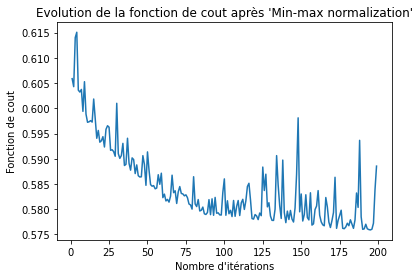

In [91]:
#Min-max normalization
Niter=200
alpha=0.01
cout=np.zeros(Niter-1)
theta=Theta
for j in range (1,Niter):
    MB=randint(0,n_app-30,1)[0]
    theta=theta-(alpha*grad(theta,XappMinMax[MB:(MB+30),:],yapp[MB:(MB+30)],30))
    cout[j-1]=fonctionCout(theta,XappMinMax,yapp,n_app)
absplot=np.linspace(1,Niter-1,Niter-1)
plt.plot(absplot,cout)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction de cout")
plt.title("Evolution de la fonction de cout après 'Min-max normalization'")

Text(0.5, 1.0, "Evolution de la fonction de cout après 'Mean normalization'")

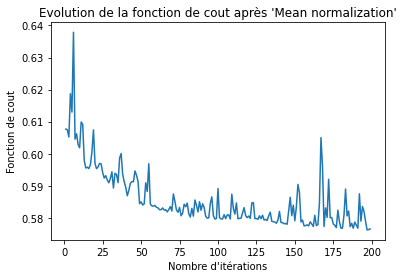

In [92]:
#Mean normalization
Niter=200
alpha=0.01
cout=np.zeros(Niter-1)
theta=Theta
for j in range (1,Niter):
    MB=randint(0,n_app-30,1)[0]
    theta=theta-(alpha*grad(theta,XappMean[MB:(MB+30),:],yapp[MB:(MB+30)],30))
    cout[j-1]=fonctionCout(theta,XappMean,yapp,n_app)
absplot=np.linspace(1,Niter-1,Niter-1)
plt.plot(absplot,cout)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction de cout")
plt.title("Evolution de la fonction de cout après 'Mean normalization'")

Text(0.5, 1.0, "Evolution de la fonction de cout après 'Standardization'")

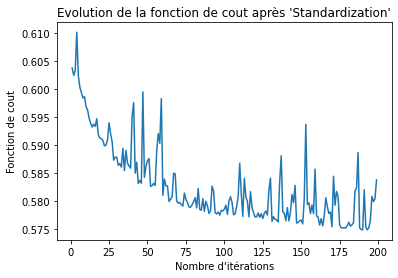

In [93]:
#Standardization 
Niter=200
alpha=0.01
cout=np.zeros(Niter-1)
theta=Theta
for j in range (1,Niter):
    MB=randint(0,n_app-30,1)[0]
    theta=theta-(alpha*grad(theta,XappStand[MB:(MB+30),:],yapp[MB:(MB+30)],30))
    cout[j-1]=fonctionCout(theta,XappStand,yapp,n_app)
absplot=np.linspace(1,Niter-1,Niter-1)
plt.plot(absplot,cout)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction de cout")
plt.title("Evolution de la fonction de cout après 'Standardization'")

On Conservera donc pour la suite la technique de "Standardization" :

In [94]:
Xapp=XappStand
for i in liste_colonne:
    Xtest[:,i]=(Xtest[:,i]-numpy.mean(Xtest, 0)[i])/(numpy.std(Xtest, 0)[i])

## Recherche linéaire

Commençons avec la descente à pas optimal avec la méthode de Broyden Fletcher Goldfard Shanno (seule méthode que nous n'avons pas codée à la main dans cette partie Regression Logistique, avec la validation croisée, afin d'avoir accès à des fonctions optimisées qui ne mettent pas trop de temps à tourner)

In [95]:
from scipy.optimize import minimize
theta_0=Theta
#On selectionne au hasard 1600 observations de notre échantillon d'apprentissage pour eviter que ce bloc de calcul mette
#plus de 10 minutes à tourner
XappBFGS=np.copy(Xapp)
yappBFGS=np.copy(yapp)
data=np.c_[XappBFGS,yappBFGS]
np.random.shuffle(data)
XappBFGS=data[1:1601,0:(data.shape[1]-1)]
yappBFGS=data[1:1601,data.shape[1]-1]
def f(theta):
    return(fonctionCout(theta,XappBFGS,yappBFGS,1600))
    #Afin que la fonction minimize comprenne qu'on cherche à optimiser notre fonction 
    #de cout en fonction de theta.
theta=minimize(f,theta_0,method='BFGS', options={'disp': True,'maxiter':2})
#Récuperons à present notre vecteur de paramètre
theta=theta['x']
#par convention on fixera le seuil à 0.5, calculons alors l'erreur de classification sur l'echantillon de test et d'apprentissage
prediction_app=(dot(Xapp,theta)>=0).astype('int')
prediction_test=(dot(Xtest,theta)>=0).astype('int')
erreur_app=(abs(yapp-prediction_app)).mean()
erreur_test=(abs(ytest-prediction_test)).mean()

         Current function value: 0.606236
         Iterations: 2
         Function evaluations: 1100
         Gradient evaluations: 4


In [96]:
print("Erreur de classification sur l'echantillon d'apprentissage de BFGS-Grad pas optimal est :", erreur_app)
print("Erreur de classification sur l'echantillon de test de BFGS-Grad pas optimal est :",erreur_test)

Erreur de classification sur l'echantillon d'apprentissage de BFGS-Grad pas optimal est : 0.33615102084908716
Erreur de classification sur l'echantillon de test de BFGS-Grad pas optimal est : 0.3374273494900757


Comparons maintenant ce résultat à celui qu'on aurait obtenu avec Wolfe-Armijo dans le cadre d'une descente de gradient classique (mini-batch toujours afin d'éviter un temps de calcul par bloc trop important)

Erreur de classification sur l'echantillon d'apprentissage de Wolfe-Armijo est : 0.31513989413416876
Erreur de classification sur l'echantillon de test de de Wolfe-Armijo est : 0.31478232262309463


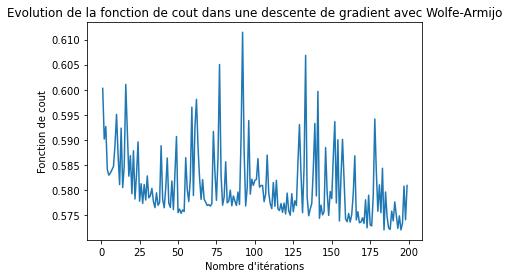

In [97]:
#Par convention on fixera
k=0.8
w=0.9  #on a bien 0<k<w<1
epsilon=1e-4
Niter =200
#on testera différente valeur de alpha suffisament grande pour trouver celle qui verifie à chaque itération Wolfe
alpha_w_possible=[0.001,0.05,0.1,0.5,1,2,5,10,20,50,100,200,500,1000] 
#idem pour Armijo
alpha_a_possible=[0.0001,0.00005,0.00001,0.000005,0.000001,0.0000001,0.00000001]    
def verifie_Wolfe(alpha,theta_n,X,y,n):
    #Retournera True si alpha verifie Wolfe et faux sinon
    #D'après nos resultats théoriques on a que alpha verifie Wolfe si :
    Gradient_J_theta_n=grad(theta_n,X,y,n)
    resultBool=(-np.vdot(Gradient_J_theta_n,grad((theta_n-alpha*Gradient_J_theta_n),X,y,n)) >= w*(-np.vdot(Gradient_J_theta_n,Gradient_J_theta_n)))
    return(resultBool)
def verifie_Armijo(alpha,theta_n,X,y,n):
    #Retournera True si alpha verifie Armijo et faux sinon
    #D'après nos resultats théoriques on a que alpha verifie Armijo si :
    Gradient_J_theta_n=grad(theta_n,X,y,n)
    Phi_en_alpha=fonctionCout(theta_n-(alpha*Gradient_J_theta_n),X,y,n)
    temp=fonctionCout(theta_n,X,y,n)-k*alpha*(np.vdot(Gradient_J_theta_n,Gradient_J_theta_n))
    resultBool=(Phi_en_alpha <= temp)
    return(resultBool)

#Implementons maintenant l'algorithme de dichotomie permettant de trouver notre alpha à chaque itération
def dichotomie(theta_n,alpha_a,alpha_w,X,y,n) :
    temp=0
    while verifie_Wolfe(alpha_w,theta_n,X,y,n)==False:
        assert ( temp<14 ) , "Erreur , alpha_w doit vérifier Wolfe et il ne le vérifie toujours pas pour 1000"
        temp+=1
        alpha_w=alpha_w_possible[temp]
    temp2=0    
    while verifie_Armijo(alpha_a,theta_n,X,y,n)==False:
        assert ( temp2<5 ) , "Erreur , alpha_a doit vérifier Armijo et il ne le vérifie toujours pas pour 0.00000001"
        temp2=temp2+1
        alpha_a=alpha_a_possible[temp2]
    xmoins , xplus , xn = alpha_a , alpha_w , ( alpha_a + alpha_w )/2 
    for f in range (Niter) :
        if  verifie_Armijo(xplus-epsilon,theta_n,X,y,n): 
            return(xplus)
        if verifie_Armijo(xn,theta_n,X,y,n):
            xmoins = xn 
            xn=(xmoins+xplus)/2
        else :
            xplus = xn
            xn = (xmoins+xplus)/2
    print (" Erreur , Wolfe-Armijo n’a pas trouvé de alpha après ", Niter , " itérations.")

#Nous sommes maintenant en mesure d'implementer notre descente de gradient :
cout=np.zeros(Niter-1)
theta=Theta  
for j in range (1,Niter):
    MB=randint(0,n_app-30,1)[0]
    alpha=dichotomie(theta,alpha_a_possible[0],alpha_w_possible[0],Xapp[MB:(MB+30),:],yapp[MB:(MB+30)],30) 
    #Selection de notre taux d'apprentissage avec Wolfe-Armijo
    theta=theta-(alpha*grad(theta,Xapp[MB:(MB+30),:],yapp[MB:(MB+30)],30))
    cout[j-1]=fonctionCout(theta,Xapp,yapp,n_app)
absplot=np.linspace(1,Niter-1,Niter-1)
plt.plot(absplot,cout)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Fonction de cout")
plt.title("Evolution de la fonction de cout dans une descente de gradient avec Wolfe-Armijo")
#par convention on fixera le seuil à 0.5, calculons alors l'erreur de classification sur l'echantillon de test et d'apprentissage
prediction_app=(dot(Xapp,theta)>=0).astype('int')
prediction_test=(dot(Xtest,theta)>=0).astype('int')
erreur_app=(abs(yapp-prediction_app)).mean()
erreur_test=(abs(ytest-prediction_test)).mean()
print("Erreur de classification sur l'echantillon d'apprentissage de Wolfe-Armijo est :", erreur_app)
print("Erreur de classification sur l'echantillon de test de de Wolfe-Armijo est :",erreur_test)

On conclut que "BFGS-Gradient pas optimal" est moins performant que Wolfe-Armijo avec direction de descente classique pour une durée d'apprentissage équivalente assez petite (moins de 10 minutes). En revanche en augmentant le nombre d'itération dans le bloc Wolfe-Armijo et le nombre d'observations tirées au hasard dans notre echantillon d'apprentissage on se rend compte que cet écart se réduit.

# 2.2 KNN

Librairies utilisées :

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

In [99]:
#Import du jeu de données 
OurData = pd.read_csv('clean_data.csv')

## Préparation des données

On note :

- X = Notre matrice contenant toutes nos variables 
- y = La target contenant toutes nos étiquettes 

Afin de tester les performances de notre algorithme on sépare nos données dans une répartition : 
- 66.66...% pour l'apprentissage 
- 33.33...% pour tester les performances de notre algorithme 

In [100]:
X = OurData.drop(['winner','Mois','Jour'], axis = 1)
y = OurData['winner']
Xapp, Xtest = train_test_split(X, test_size=0.33, random_state=42)
yapp, ytest = train_test_split(y, test_size=0.33, random_state=42)
X_train=np.array(Xapp)
X_test=np.array(Xtest)
y_train=np.array(yapp)
y_test=np.array(ytest)

Afin d'éviter un macimum de déséquilibre dans notre jeu de données (par exemple de grands ecart entre les valeurs de nos observations) on normaliser nos differentes variables.

In [101]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Premier test

On réalise un premier test avec les paramètres du kNN par défaut. En principe, l'algorithme va optimiser lui même ses paramètres en fonction de la forme de notre jeu de données.

In [102]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

On obtient ensuite un premier résultat : accuracy = 0.85. Ce résultat va nous servir de base pour la selection de notre hyperparamètre.

In [103]:
y_pred =  classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8465566399824542


## Choix de l'hyperparamètre

Nous commencons par faire varier la valeur de l'hyperparamètre en fonction des resultats théoriques trouvés dans la partie "Choix du nombre k de plus proches voisins". Nous stockons ensuite les resultats des differnents paramètre dans une liste qui nous servira a construire un graphique.

In [105]:
accuracy = []

for i in range(10):
    clf = KNeighborsClassifier( n_neighbors = int(y_train.sum()**(1/(i+1))))
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy.append(accuracy_score(predictions, y_test))

KeyboardInterrupt: 

On observe sur le graphique que nous obtenons les meilleurs résultats pour la racine 6ème de 1/n. Pour s'assurer de la généralisation de notre modèle nous allons réaliser une 5-validation croisée stratifieiée. La validation croisée stratifiée sur globalement le meme principe que la validation croisée expliquée dans la partie préliminaire, la difference est qu'elle essaye de répartir les données dans le fold de manière a avoir la même fréquence d'apparition des differentes étiquettes que dans le jeu de données original.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(1,len(accuracy),len(accuracy)), y=accuracy,mode='lines'))
fig.update_yaxes(title_text="Accuracy")
fig.show()

On définit un pipeline dont le but est de réaliser plusiseurs opérations successivement. Ici, le pipeline nous sert a automatiquement renormaliser les données.

In [ ]:
stepsknn = [('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(n_neighbors = int(y_sample4.count()**(1/6))))] 
pipelineknn = Pipeline(stepsknn)


Ici nous définissons la 5-validation croisée en définissant "accuracy" comme métrique de performance.

In [ ]:
scoreknn = cross_val_score(pipelineknn, X, y, cv=5, scoring = make_scorer(accuracy_score))

Les résultats obtenus avec l'hyperparamètre convergent en moyenne vers ceux obtenus avec la selection de paramètre automatique.

In [ ]:
fig = go.Figure(layout = go.Layout(plot_bgcolor='orange'))
fig.add_trace(go.Scatter(x=np.linspace(1,5,5), y=scoreknn,mode='lines', name='accuracy according to the fold',line=dict(color="red")))
fig.update_xaxes(title_text="Fold")
fig.update_yaxes(title_text="Accuracy kNN")
fig.show()

# 2.3 SVM

## Premier test

On réeffectue les mêmes test que dans la partie précednete avec le SVM. La particularité de SGDClassifier est qu'il s'agit du SVM optimisé via la méthode du gradient stochastique. On obtient un score d'environ 0.75 avec les valeurs par défaut.

In [ ]:
classifier = SGDClassifier()
classifier.fit(X_train , y_train )
y_pred =  classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

On choisit ainsi d'observer les performances pour un certain nombre de paramètres couramment utilisés. Ce paramètre représente l'hyperparamètre du problème de régularisation.

In [ ]:
accuracy = []
param_C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in param_C :
    classifier = SGDClassifier(alpha=i)
    classifier.fit(X_train , y_train )
    y_pred =  classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
fig = go.Figure(layout = go.Layout(plot_bgcolor='orange'))
fig.add_trace(go.Scatter(x=np.linspace(1,8,8), y=accuracy,mode='lines', name='accuracy according to the fold',line=dict(color="red")))
fig.update_xaxes(title_text="hyperparameters")
fig.update_yaxes(title_text="Accuracy SGD")
fig.show()

Après avoir observé que l'on obtenait les meilleures performances pour alpha=1, on réitère le test en modifiant cette fois le nombre d'itérations maximales .

In [ ]:
accuracy = []
n_iters = [5, 10, 20, 50, 100, 1000, 10000, 100000, 1000000]
for n in n_iters :
    classifier = SGDClassifier(alpha=0.01, max_iter=n)
    classifier.fit(X_train , y_train )
    y_pred =  classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

On observe qu'augmenter le nombre d'itérations maximale n'augmente pas drastiquement les performances de notre algorithme qui se rapprochent deja des performances de l'algorithme par défaut.

In [ ]:
fig = go.Figure(layout = go.Layout(plot_bgcolor='orange'))
fig.add_trace(go.Scatter(x=np.linspace(1,8,8), y=accuracy,mode='lines', name='accuracy according to the fold',line=dict(color="red")))
fig.update_xaxes(title_text="hyperparameters")
fig.update_yaxes(title_text="Accuracy SGD")
fig.show()

# 2.4 Random Forest

## Import des libraries et des données

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
# Create random data with numpy
import numpy as np
import time

In [ ]:
df = pd.read_csv('clean_data.csv')

## Définition de X et Y

Y = variable d'intérêt

X = données sur les matchs avant qu'ils aient lieu

In [ ]:
X = df.drop(["winner"],axis=1)
Y = df.loc[:,"winner"]

## On sépare les données entre train et test

In [ ]:
x_train,x_test = train_test_split(X, test_size=0.33, random_state=42)
y_train, y_test = train_test_split(Y, test_size=0.33, random_state=42)

## Algorithme

Max_depth = profondeur maximale pour chaque arbre de la forêt (fixe donc le nombre de noeuds). Ici fixé à 20.

n_estimators = nombre d'arbres dans la forêt. Ici fixé à 35.

In [ ]:
clf = RandomForestClassifier(max_depth=20, n_estimators=35)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(accuracy_score(predictions, y_test))

## Hyperparameter tuning - Comment selectionner le nombre d'arbres optimal

Dans cette partie, nous avons essayé 100 valeurs differentes pour le paramètre n_estimators pour voir combien d'arbres de décision permettent de créer la meilleure forêt. Nous observons les résultats dans un graphe.

In [ ]:
accuracy = []

for i in range(100):
    clf = RandomForestClassifier(max_depth=50, n_estimators=i+1)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy.append(accuracy_score(predictions, y_test))
    print(i)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(1,len(accuracy),len(accuracy)), y=accuracy,mode='lines', name='accuracy according to number of trees', ))
fig.update_xaxes(title_text="number of trees")
fig.update_yaxes(title_text="Accuracy")
fig.show()


La forêt optimale est donc formée de 35 arbres.

## Quelle profondeur optimale ?

Dans cette partie, nous avons essayé 100 valeurs differentes pour le paramètre max_depth pour voir jusqu'où nos arbres de décision peuvent aller sans sur apprendre les données. Nous observons les résultats dans un graphe.

In [ ]:
accuracy_depth = np.zeros(100)

for i in range(100):
    clf = RandomForestClassifier(max_depth=i+1, n_estimators=35)
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy_depth[i] = accuracy_score(predictions, y_test)

In [ ]:
fig = go.Figure(layout = go.Layout(
    plot_bgcolor='pink'
))
fig.add_trace(go.Scatter(x=np.linspace(1,len(accuracy_depth),len(accuracy_depth)), y=accuracy_depth,mode='lines', name='accuracy according to maximum depth of trees',line=dict(color="red")))
fig.update_xaxes(title_text="maximum depth")
fig.update_yaxes(title_text="Accuracy")
fig.show()

La profondeur maximale adéquate est 20

# 3. Approche Deep Learning

# 3.1 Création d'un réseau de neurones avec Keras

## Import des librairies et des données

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('clean_data.csv')

Séparer Y variable d'intérêt et X l'information

In [ ]:
df_X = df.drop(['winner'], axis = 1)
df_Y = df['winner']

Séparation entre train et test

In [ ]:
x_train,x_test = train_test_split(df_X, test_size=0.33, random_state=42)
y_train, y_test = train_test_split(df_Y, test_size=0.33, random_state=42)

In [ ]:
#to use loadtxt we need csv but we could have done otherwise 
x_train.to_csv('dataset_x_train.csv',index=False)
x_test.to_csv('dataset_x_test.csv',index=False)
y_train.to_csv('dataset_y_train.csv',index=False)
y_test.to_csv('dataset_y_test.csv',index=False)

Ici, nous avons recréé des csv pour pouvoir utiliser la fonction loadtxt directement. Cette étape n'était pas nécessaire si on avait utilisé une fonction qui prend en argument un dataframe.

In [ ]:
# load the dataset
x_train = loadtxt('dataset_x_train.csv', skiprows = 1,delimiter=',')
x_test = loadtxt('dataset_x_test.csv', skiprows = 1,delimiter=',')
y_train = loadtxt('dataset_y_train.csv', skiprows = 1,delimiter=',')
y_test = loadtxt('dataset_y_test.csv', skiprows = 1,delimiter=',')

## Création du modèle

## Hyperparamètres à fixer pour les modèles:

Nous avons tester les modèles ci-dessous en modifiant les hyperparamètres de multiple fois.

In [ ]:
nb_neurones = 70 #chose number of neurones in hidden layers (1rst and last layer's neurones are fixed)
ep = 150 #chose number of epochs
bs = 30 #chose batch_size

## Modèle à 3 couches cachées

Definition des couches

In [ ]:
model = Sequential()
model.add(Dense(nb_neurones, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(nb_neurones, activation= 'relu'))
model.add(Dense(nb_neurones, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

Choix de la fonction de perte, de l'optimiseur et de la métrique

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

On entraîne le réseau sur les données 'train'

In [ ]:
res=model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=ep, batch_size=bs)

Graphique représentant l'évolution de l'accuracy pour les données train et les données test.

In [ ]:
size_epochs = len(res.history["accuracy"])
epochs = np.linspace(0,size_epochs,size_epochs+1)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=res.history["accuracy"],mode='lines', name='training set' ))
fig.add_trace(go.Scatter(x=epochs, 
                         y=res.history["val_accuracy"],
                         mode='lines',
                         name='test set',
                         marker=dict(
                          color='red'
                          )))

#fig.update_layout(legend_title_text = "Accuracy evolution according to number of trees")
fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy")
fig.show()


## Modèle à 5 couches cachées

In [ ]:
model1 = Sequential()
model1.add(Dense(nb_neurones, input_dim=(x_train.shape[1]), activation='relu'))
model1.add(Dense(nb_neurones, activation='relu'))
model1.add(Dense(nb_neurones, activation = 'relu'))
model1.add(Dense(nb_neurones, activation = 'relu'))
model1.add(Dense(nb_neurones, activation = 'relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res1=model1.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=bs)

In [ ]:
size_epochs = len(res1.history["accuracy"])
epochs = np.linspace(0,size_epochs,size_epochs+1)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=res1.history["accuracy"],mode='lines', name='training set' ))
fig.add_trace(go.Scatter(x=epochs, 
                         y=res1.history["val_accuracy"],
                         mode='lines',
                         name='test set',
                         marker=dict(
                          color='red'
                          )))

#fig.update_layout(legend_title_text = "Accuracy evolution according to number of trees")
fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy")
fig.show()

## Modèle à 7 couches cachées

In [ ]:
model2 = Sequential()
model2.add(Dense(nb_neurones, input_dim=x_train.shape[1], activation='relu'))
model2.add(Dense(nb_neurones, activation='relu'))
model2.add(Dense(nb_neurones, activation = 'relu'))
model2.add(Dense(nb_neurones, activation = 'relu'))
model2.add(Dense(nb_neurones, activation = 'relu'))
model2.add(Dense(nb_neurones, activation = 'relu'))
model2.add(Dense(nb_neurones, activation = 'relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res2=model2.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=ep, batch_size=bs)

In [ ]:
size_epochs = len(res2.history["accuracy"])
epochs = np.linspace(0,size_epochs,size_epochs+1)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=res2.history["accuracy"],mode='lines', name='training set' ))
fig.add_trace(go.Scatter(x=epochs, 
                         y=res2.history["val_accuracy"],
                         mode='lines',
                         name='test set',
                         marker=dict(
                          color='red'
                          )))

#fig.update_layout(legend_title_text = "Accuracy evolution according to number of trees")
fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy")
fig.show()

## Modèle à 10 couches cachées

In [ ]:
model3 = Sequential()
model3.add(Dense(nb_neurones, input_dim=x_train.shape[1], activation='relu'))
model3.add(Dense(nb_neurones, activation='relu'))
model3.add(Dense(nb_neurones, activation = 'relu'))
model3.add(Dense(nb_neurones, activation = 'relu'))
model3.add(Dense(nb_neurones, activation = 'relu'))
model3.add(Dense(nb_neurones, activation = 'relu'))
model3.add(Dense(nb_neurones, activation = 'relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
res3=model3.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=ep, batch_size=bs)

In [ ]:
size_epochs = len(res3.history["accuracy"])
epochs = np.linspace(0,size_epochs,size_epochs+1)

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=res3.history["accuracy"],mode='lines', name='training set' ))
fig.add_trace(go.Scatter(x=epochs, 
                         y=res3.history["val_accuracy"],
                         mode='lines',
                         name='test set',
                         marker=dict(
                          color='red'
                          )))

#fig.update_layout(legend_title_text = "Accuracy evolution according to number of trees")
fig.update_xaxes(title_text="Epoch")
fig.update_yaxes(title_text="Accuracy")
fig.show()